In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import datetime

Read the data into six separate dataframes.

In [4]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
#week_nums = [200606, 200530, 200523, 200516, 200502, 200425]
week_nums = [200606, 200530, 200411, 200321, 200208, 200118]
turnstiles_df = get_data(week_nums)

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [6]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [8]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


Concatenate the data into one dataframe.

In [10]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205616,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,04:00:00,REGULAR,5554,420
205617,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,08:00:00,REGULAR,5554,420
205618,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,12:00:00,REGULAR,5554,420
205619,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,16:00:00,REGULAR,5554,420
205620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/17/2020,20:00:00,REGULAR,5554,420


In [11]:
turnstiles_df.DATE.value_counts().sort_index()

01/11/2020    29283
01/12/2020    29365
01/13/2020    29470
01/14/2020    29428
01/15/2020    29324
01/16/2020    29366
01/17/2020    29385
02/01/2020    29433
02/02/2020    29444
02/03/2020    29592
02/04/2020    29519
02/05/2020    29295
02/06/2020    29306
02/07/2020    29331
03/14/2020    29343
03/15/2020    29363
03/16/2020    29430
03/17/2020    29420
03/18/2020    29791
03/19/2020    29998
03/20/2020    29400
04/04/2020    29439
04/05/2020    29340
04/06/2020    29480
04/07/2020    29443
04/08/2020    29367
04/09/2020    29444
04/10/2020    29468
05/23/2020    29507
05/24/2020    29480
05/25/2020    30166
05/26/2020    30697
05/27/2020    30339
05/28/2020    29902
05/29/2020    30323
05/30/2020    30669
05/31/2020    29508
06/01/2020    29668
06/02/2020    29405
06/03/2020    29627
06/04/2020    29591
06/05/2020    29424
Name: DATE, dtype: int64

Exercise 1.2
Let's turn this into a time series. Create a new column that stores the date and time as a single pandas datetime object.

In [12]:
from datetime import datetime as dt

In [13]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

The DATE and TIME columns are object datatypes, which in Pandas is a string.

In [14]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


In [15]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


In [16]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
187403,H001,R175,00-00-02,8 AV,2020-02-01 00:00:00,2
233112,J009,R378,00-00-01,MYRTLE AV,2020-05-27 05:00:00,2
828378,R141,R031,00-03-01,34 ST-PENN STA,2020-03-18 16:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [17]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "J009") & 
(turnstiles_df["UNIT"] == "R378") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "MYRTLE AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2020, 5, 27).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
40877,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,01:00:00,REGULAR,3047244,2109618,2020-05-27 01:00:00
40878,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,REGULAR,3047247,2109623,2020-05-27 05:00:00
40879,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,05:00:00,RECOVR AUD,3047246,2109623,2020-05-27 05:00:00
40880,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,09:00:00,REGULAR,3047363,2109697,2020-05-27 09:00:00
40881,J009,R378,00-00-01,MYRTLE AV,JMZ,BMT,05/27/2020,13:00:00,REGULAR,3047424,2109765,2020-05-27 13:00:00


In [18]:
turnstiles_df.DESC.value_counts()

REGULAR       1237883
RECOVR AUD       4690
Name: DESC, dtype: int64

In [19]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2020-01-11 03:00:00,1
828387,R141,R031,00-03-01,34 ST-PENN STA,2020-03-20 04:00:00,1
828385,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 20:00:00,1
828384,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 16:00:00,1
828383,R141,R031,00-03-01,34 ST-PENN STA,2020-03-19 12:00:00,1


In [21]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [22]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [23]:
turnstiles_daily.head(50)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/11/2020,7340476
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249
5,A002,R051,02-00-00,59 ST,01/16/2020,7346629
6,A002,R051,02-00-00,59 ST,01/17/2020,7347954
7,A002,R051,02-00-00,59 ST,02/01/2020,7364808
8,A002,R051,02-00-00,59 ST,02/02/2020,7365408
9,A002,R051,02-00-00,59 ST,02/03/2020,7366662


In [24]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .apply(lambda grp: grp.shift(1)))

In [25]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/11/2020,7340476,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0


Remove Nan rowv for prev_date and prev_entries

In [26]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

Next, let's look at some more weirdness in the data and think about handling it before we finalize our daily count column

In [27]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
476,A002,R051,02-06-00,59 ST,03/14/2020,35096,02/07/2020,76716.0
686,A006,R079,00-00-04,5 AV/59 ST,05/23/2020,1258,04/10/2020,7896758.0
714,A006,R079,00-03-00,5 AV/59 ST,03/14/2020,2330,02/07/2020,9410826.0
1060,A007,R079,01-06-03,5 AV/59 ST,04/07/2020,4,04/06/2020,7832194.0
1625,A011,R080,01-03-00,57 ST-7 AV,01/12/2020,885732015,01/11/2020,885732453.0


In [28]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST               1
A006   R079  00-00-04  5 AV/59 ST          1
             00-03-00  5 AV/59 ST          1
A007   R079  01-06-03  5 AV/59 ST          1
A011   R080  01-03-00  57 ST-7 AV         41
                                          ..
R629   R065  00-03-00  ROCKAWAY AV         1
R639   R109  00-05-02  CHURCH AV           1
R729   R292  00-00-01  BAYCHESTER AV       1
R730   R431  00-00-04  EASTCHSTER/DYRE    41
TRAM1  R468  00-00-01  RIT-MANHATTAN       1
Length: 288, dtype: int64

In [29]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1258 7896758.0
2330 9410826.0
4 7832194.0
1687 1562921047.0
848 1180101.0
4875 7244466.0
5305 1196338.0
43 6777224.0
17224 1083160.0
294 6612092.0
107 8235039.0
2033924 364303.0
36 5666890.0
25 8800439.0
475952125 7379372.0
2920 3114791.0
618862 2624193.0
17126450 19676957.0
15066625 17126282.0
25528773 15065804.0
12316490 25525671.0
72 1015375.0
1616 2632946.0
2800 3567412.0
13865 6119754.0
49 8294808.0
15 2090862.0
18 168627933.0
1175 4733498.0
83886121 22940.0
16965 11957933.0
2937635 79502.0
321184286 5589416.0
307624182 321184285.0
673 4895014.0
32 1317615.0
4785471 11470775.0
47325 4829073.0
6031 2011827.0
270537780 536177.0
2323 13973128.0
1062 2302008.0
3139 2405464.0
395233 2064683.0
111220 6561938.0
2010 22737699.0
18023 3853709.0
524538 118139950.0
14336 69155900.0
4410 9499451.0
8988 8436536.0
2863 1936022.0
25316 1476413.0
1245971397 2299884.0
1779 3529732.0
60 7675482.0
8369771 1820899.0
578409 2805680.0
2162 9037638.0
3779 1501563.0
1627393907 6366854.0
203 1408008.0
12 

In [30]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [31]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/12/2020,7341214,01/11/2020,7340476.0,738.0
2,A002,R051,02-00-00,59 ST,01/13/2020,7342558,01/12/2020,7341214.0,1344.0
3,A002,R051,02-00-00,59 ST,01/14/2020,7343865,01/13/2020,7342558.0,1307.0
4,A002,R051,02-00-00,59 ST,01/15/2020,7345249,01/14/2020,7343865.0,1384.0
5,A002,R051,02-00-00,59 ST,01/16/2020,7346629,01/15/2020,7345249.0,1380.0


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

/Users/albinasitdikova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DAILY_ENTRIES', ylabel='Density'>

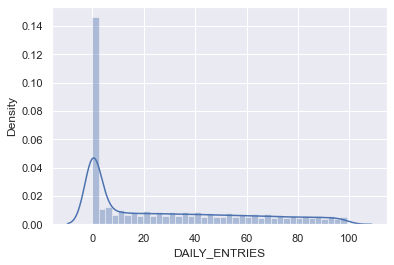

In [33]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 100])

### Cleaning the data for too big entries

In [34]:
def clean_daily_entries(row, median):

#Change entries that bigger than median * 5 to median
    counter = row['DAILY_ENTRIES']
    if counter > median*5:
        return median
    
    return counter

In [35]:
median =turnstiles_daily.sort_values("DAILY_ENTRIES", ascending=False)[['DAILY_ENTRIES']].median()['DAILY_ENTRIES']
median

181.0

In [36]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(clean_daily_entries, axis=1, median=median)

Distribution of daily entries by station, for top 10 stations by volume¶

In [37]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/12/2020,1923.0
1,1 AV,01/13/2020,2777.0
2,1 AV,01/14/2020,2747.0
3,1 AV,01/15/2020,2789.0
4,1 AV,01/16/2020,2848.0


In [38]:
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
226          FULTON ST
110              86 ST
46               23 ST
233    GRD CNTRL-42 ST
9               125 ST
59     34 ST-HERALD SQ
173           CANAL ST
68     42 ST-PORT AUTH
85               59 ST
Name: STATION, dtype: object

### Challenge 6


Similarly, combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station.

In [39]:
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/12/2020,1923.0
1,1 AV,01/13/2020,2777.0
2,1 AV,01/14/2020,2747.0
3,1 AV,01/15/2020,2789.0
4,1 AV,01/16/2020,2848.0


For specific station

In [40]:
mask_station = (stations_daily["STATION"] == "RIT-ROOSEVELT")

In [41]:
specific_station_daily = stations_daily[mask_station]

In [42]:
specific_station_daily

,STATION,DATE,DAILY_ENTRIES
13498,RIT-ROOSEVELT,01/12/2020,875.0
13499,RIT-ROOSEVELT,01/13/2020,698.0
13500,RIT-ROOSEVELT,01/14/2020,1427.0
13501,RIT-ROOSEVELT,01/15/2020,764.0
13502,RIT-ROOSEVELT,01/16/2020,799.0
13503,RIT-ROOSEVELT,01/17/2020,727.0
13504,RIT-ROOSEVELT,02/01/2020,733.0
13505,RIT-ROOSEVELT,02/02/2020,818.0
13506,RIT-ROOSEVELT,02/03/2020,801.0
13507,RIT-ROOSEVELT,02/04/2020,771.0


### Challenge 7


Plot the daily time series for a station.

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

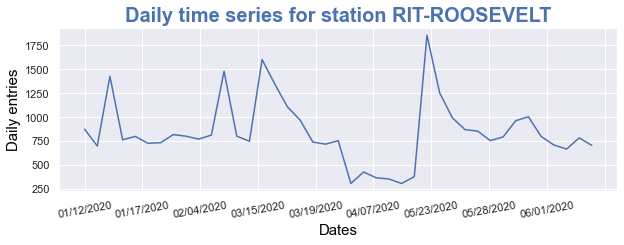

In [44]:
plt.figure(figsize=(10,3))

plt.plot(specific_station_daily.DATE, specific_station_daily['DAILY_ENTRIES'])
#plt.grid()
ticks_x = np.linspace(0, specific_station_daily.shape[0], 10)
plt.xticks(ticks_x, rotation=10)

plt.title('Daily time series for station RIT-ROOSEVELT',fontsize = 20, weight='bold',color='b')
plt.ylabel('Daily entries', fontsize = 15, color='black');
plt.xlabel('Dates', fontsize = 15, color='black');


### Challenge 8

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day of week may be useful)
plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other

In [45]:
specific_station_daily.head()

,STATION,DATE,DAILY_ENTRIES
13498,RIT-ROOSEVELT,01/12/2020,875.0
13499,RIT-ROOSEVELT,01/13/2020,698.0
13500,RIT-ROOSEVELT,01/14/2020,1427.0
13501,RIT-ROOSEVELT,01/15/2020,764.0
13502,RIT-ROOSEVELT,01/16/2020,799.0


In [46]:
change_dates_form = pd.to_datetime(specific_station_daily['DATE'])

In [47]:
specific_station_daily['DAY_OF_WEEK']=change_dates_form.dt.dayofweek
specific_station_daily

<ipython-input-47-e845aaa7c3a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_station_daily['DAY_OF_WEEK']=change_dates_form.dt.dayofweek


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK
13498,RIT-ROOSEVELT,01/12/2020,875.0,6
13499,RIT-ROOSEVELT,01/13/2020,698.0,0
13500,RIT-ROOSEVELT,01/14/2020,1427.0,1
13501,RIT-ROOSEVELT,01/15/2020,764.0,2
13502,RIT-ROOSEVELT,01/16/2020,799.0,3
13503,RIT-ROOSEVELT,01/17/2020,727.0,4
13504,RIT-ROOSEVELT,02/01/2020,733.0,5
13505,RIT-ROOSEVELT,02/02/2020,818.0,6
13506,RIT-ROOSEVELT,02/03/2020,801.0,0
13507,RIT-ROOSEVELT,02/04/2020,771.0,1


In [48]:
station_day_of_week = specific_station_daily.groupby(['DAY_OF_WEEK'])['DAILY_ENTRIES'].sum()
station_day_of_week

DAY_OF_WEEK
0    5065.0
1    5251.0
2    4420.0
3    4864.0
4    4123.0
5    5054.0
6    5860.0
Name: DAILY_ENTRIES, dtype: float64

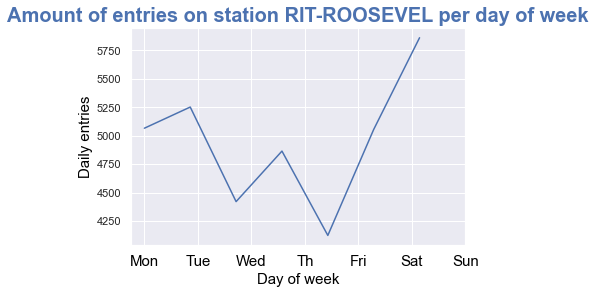

In [49]:
plt.plot(station_day_of_week)

plt.title('Amount of entries on station RIT-ROOSEVEL per day of week',fontsize = 20, weight='bold',color='b')
plt.ylabel('Daily entries', fontsize = 15, color='black')
plt.xlabel('Day of week', fontsize = 15, color='black')

ticks_x = np.linspace(0, 7, 7)
weeks=['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks_x, weeks, fontsize = '15',color='black');

What if we don't have some data about all days a week in a row?
We should check if we have missing data in weeks and if we do, we are not gonna look at them

In [50]:
def check_weeks(list_of_weeks, entries):
    checked_list_of_week =[]
    checked_entries = []
    help_list=[]
    help_enrties=[]
    
    for i in range(0, len(list_of_weeks), 1):
        if list_of_weeks[i]==0:
            if len(help_list)==7:
                checked_list_of_week.append(help_list)
                checked_entries.append(help_enrties)
            help_list=[]
            help_enrties=[]

        help_list.append(list_of_weeks[i])
        help_enrties.append(entries[i])
        
    return checked_list_of_week, checked_entries

In [51]:
l1 = list(specific_station_daily['DAY_OF_WEEK'])

In [52]:
l2 = list(specific_station_daily['DAILY_ENTRIES'])

In [53]:
specific_station_daily.sort_values("DAILY_ENTRIES", ascending=False).median()

DAILY_ENTRIES    793.0
DAY_OF_WEEK        3.0
dtype: float64

In [54]:
week_count_list = check_weeks(l1,l2)
week_count_list

([[0, 1, 2, 3, 4, 5, 6],
  [0, 1, 2, 3, 4, 5, 6],
  [0, 1, 2, 3, 4, 5, 6],
  [0, 1, 2, 3, 4, 5, 6],
  [0, 1, 2, 3, 4, 5, 6]],
 [[698.0, 1427.0, 764.0, 799.0, 727.0, 733.0, 818.0],
  [801.0, 771.0, 813.0, 1480.0, 802.0, 748.0, 1602.0],
  [1346.0, 1107.0, 969.0, 740.0, 718.0, 754.0, 307.0],
  [427.0, 366.0, 354.0, 307.0, 378.0, 1856.0, 1254.0],
  [994.0, 870.0, 854.0, 755.0, 793.0, 963.0, 1004.0]])

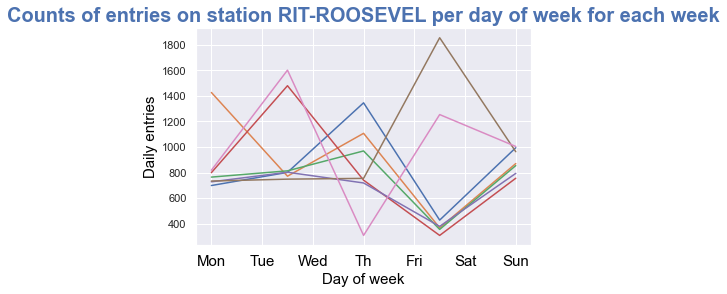

In [55]:
#l1=[0, 1, 2, 3, 4, 5, 6]
plt.plot(week_count_list[1])

plt.title('Counts of entries on station RIT-ROOSEVEL per day of week for each week',fontsize = 20, weight='bold',color='b')
plt.ylabel('Daily entries', fontsize = 15, color='black')
plt.xlabel('Day of week', fontsize = 15, color='black');

ticks_x = np.linspace(0, 4, 7)
weeks=['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat', 'Sun']
plt.xticks(ticks_x, weeks, fontsize = '15',color='black');



#### Show percentage of ridership that top 5 stations make up

In [56]:
top5_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(5))

top5_stations

61      34 ST-PENN STA
226          FULTON ST
110              86 ST
46               23 ST
233    GRD CNTRL-42 ST
Name: STATION, dtype: object

In [57]:
# next create a new df that filters the stations daily data down
# to the top 5 stations and group then by stations
percentage_of_riders_top5 = \
    (stations_daily[stations_daily['STATION']
                    .isin(top5_stations)]
     .groupby(['STATION'])[['STATION', 'DAILY_ENTRIES']]
     .sum()
     .reset_index())

Finding percentage of riders for each station

In [58]:
sum_entries_5station = percentage_of_riders_top5.DAILY_ENTRIES.sum()

In [59]:
percentage_of_riders_top5['procents']= percentage_of_riders_top5['DAILY_ENTRIES']/sum_entries_5station * 100
percentage_of_riders_top5

,STATION,DAILY_ENTRIES,procents
0,23 ST,501003.0,17.660470
1,34 ST-PENN STA,739729.0,26.075617
2,86 ST,535023.0,18.859683
3,FULTON ST,595801.0,21.002122
4,GRD CNTRL-42 ST,465305.0,16.402108


Removing column "DAILY_ENTRIES"

In [60]:
percentage_of_riders_top5 = percentage_of_riders_top5.drop(["DAILY_ENTRIES"], axis=1, errors="ignore")
percentage_of_riders_top5

,STATION,procents
0,23 ST,17.660470
1,34 ST-PENN STA,26.075617
2,86 ST,18.859683
3,FULTON ST,21.002122
4,GRD CNTRL-42 ST,16.402108


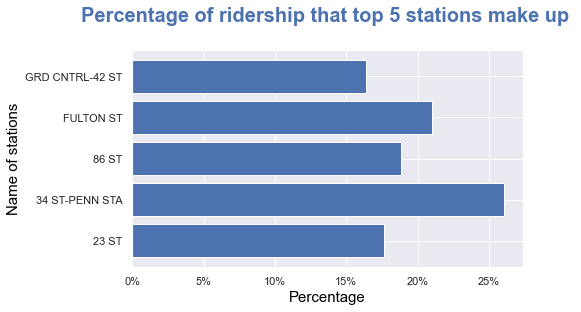

In [61]:
import matplotlib.ticker as mtick

data = percentage_of_riders_top5['STATION']
perc = percentage_of_riders_top5['procents']

fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

ax.barh(data, perc)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.title('Percentage of ridership that top 5 stations make up \n',fontsize = 20, weight='bold',color='b')
plt.ylabel('Name of stations', fontsize = 15, color='black');
plt.xlabel('Percentage', fontsize = 15, color='black');

plt.show();

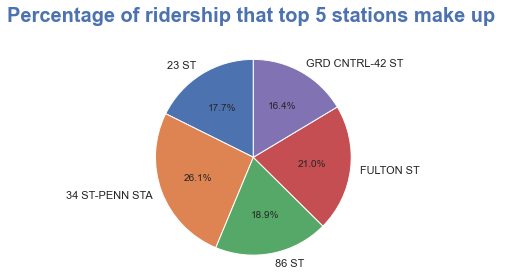

In [62]:
labels = percentage_of_riders_top5['STATION']
sizes = percentage_of_riders_top5['procents']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of ridership that top 5 stations make up \n',fontsize = 20, weight='bold',color='b')
plt.show();